# Angelo Rossi (u18141529)
CPN321 Assignment Part 2

In [1]:
import numpy as np
import sympy as sp
from scipy import optimize
from matplotlib import pyplot as plt

sp.init_printing()
%matplotlib notebook

In [2]:
"""Parameters"""

D = 5/60 # h
V = 1 #L

ρna = 1.42 #kg/L 
ρg = 1.223 
ρs = 1

ms = 0.002 # L/h/mA
mna = 0.0002
mg = 0.002

Cgi = 1.744 #mol/L
Cni = 0.0097 #mol/L 
Cnaohi = 10 #mol/L

MMo2 = 32 #g/mol
MMco2 = 44

Vg = 0.2 #L
R = 8.314
P = 105 #kPa
T = 36 + 273.15 #K
klao2 = 54
klaco2 = 27
Co2sat = 7E-3/MMo2
Cco2sat = 1/MMco2
yo2 = 0.19 #mol/mol
yco2 = 0.08
yn2 = 1 - yo2 - yco2
Co2in = yo2*P/(R*T) #mol/L
Cco2in = yco2*P/(R*T)

ρo2 = 1.429 /1000 #kg/L
ρco2 = 1.977/1000 
ρn2 = 1.2506/1000

Ka1 = 8.85*10**(-4) #  first acid dissociation constant        mol/l
Ka2 = 3.21*10**(-5) #  second acid dissociation constant        mol/l
Kw = 10**(-14) # water constant

μmax = 0.15
Kmg = 0.005
Kmn = 0.01
θmax = 0.0
ζmax = 0.25
yxn = 0.2
α = 0.1
γ = 2.1
β = 0.1

Mbase = 0.5 # kg
CPbase = 0.9 # kJ\kg\K
CPL = 4.186  # kJ\kg\K
Ubase = 0.1 # kW/m2/K
Abase = 0.05 # m2
Tref = 273.15 +20 # K
CPNa = 1
CPg = 3.3 # kJ\kg\K
CPs = 4.186  # kJ\kg\K
Ugas = 0.1 # kW/m2/K
Agas = 0.5 # m2

Tin = 25 + 273.15
Cpo2 = 0.918 # kJ/kg/K  
Cpco2 = 0.85415
Cpn2 = 1.04

In [3]:
"""Inputs"""

sna = 8 # mA
sg = 6
ss = 6
Q = 6  # L/h
Qheat = 0.1 # kW

In [4]:
"""Initial conditions"""

Cg_t0,Cx_t0,Cf_t0,Cn_t0 = [1.77680129e-03,3.18429153e-01,0,3.02285693e-04,]
                                                                
Nfah2_t0,Nfah_t0,Nfa_t0,Nna_t0,Noh_t0,Nh_t0 = [0,0,0,0,4.65505927e-10,3.28056847e-05]

Co2l_t0,Cco2l_t0,Co2g_t0,Cco2g_t0 =[1.29808410e-04,2.27703876e-02,6.96134688e-03,3.46215209e-03]

ρout_t0,ρoutg_t0 = [1.11501216e+00,1.34189888e-03]

Tb_t0,Tl_t0,Tg_t0 = [3.21974624e+02,3.01651227e+02,2.96142450e+02,]

Cpmix_t0 = 1.00355672e+00


In [5]:
"""pH equations"""

def model_pH(inputs, outputs, parameters):
    F,D  = inputs # these are the rates of fumaric acid and NaOH respectively
    AH2, AH, A2, Na, OH, H = outputs # A refers to the Acid in this case fumarate
    Ka1,Ka2,Kw = parameters
    Q = 0
    
    if H < 0:
        H = 0
    if OH < 0:
        OH = 0
    if A2 < 0:
        A2 = 0                  
    if AH < 0:
        AH = 0
    if AH2 < 0:
        AH2 = 0
        
    Denom = AH*H**2 + 2*AH*H*Ka2*V + 2*A2*H**2 + A2*H*Ka1*V + H**3 +  \
            Ka1*V*H**2 + OH*H**2 + H*Ka1*Ka2*V**2 + H*Ka1*OH*V + Ka1*Ka2*OH*V**2
    
    dOHdt = (-2*AH*H*Ka2*OH*Q + 2*AH*H*Kw*V*Q - AH*Ka1*Ka2*OH*V*Q + 4*AH*Ka2*Kw*Q*V**2 -  \
            AH2*H*Ka1*OH*Q - 2*AH2*Ka1*Ka2*OH*V*Q + 4*A2*H*Kw*V*Q + 2*A2*Ka1*Kw*Q*V**2 +  \
            2*Kw*V*Q*H**2 + OH*D*H**2 + 2*H*Ka1*Kw*Q*V**2 + H*Ka1*OH*V*D - H*Ka1*OH*V*F +  \
            2*Ka1*Ka2*Kw*Q*V**3 + Ka1*Ka2*OH*D*V**2 - 2*Ka1*Ka2*OH*F*V**2)/Denom
    
    dA2dt = (H*Ka2*Q*AH**2 + AH*Ka2*Q*H**2 + AH*H*Ka1*Ka2*V*Q + AH*H*Ka2*OH*Q + AH*H*Ka2*V*D +  \
            AH*Ka1*Ka2*OH*V*Q - 2*AH*Ka2*Kw*Q*V**2 - AH2*A2*H*Ka1*Q + AH2*H*Ka1*Ka2*V*Q +  \
            AH2*Ka1*Ka2*OH*V*Q + A2*D*H**2 + A2*H*Ka1*V*D - A2*H*Ka1*V*F - 2*A2*H*Kw*V*Q -  \
            2*A2*Ka1*Kw*Q*V**2 + H*Ka1*Ka2*F*V**2 + Ka1*Ka2*OH*F*V**2)/Denom
    
    dAHdt = (-2*H*Ka2*Q*AH**2 + AH*D*H**2 - AH*H*Ka1*Ka2*V*Q - 2*AH*H*Kw*V*Q - AH*Ka1*Ka2*OH*V*Q +  \
            2*AH2*A2*H*Ka1*Q + AH2*Ka1*Q*H**2 + AH2*H*Ka1*OH*Q - A2*H*Ka1*V*D + 2*A2*H*Ka1*V*F +  \
            2*A2*Ka1*Kw*Q*V**2 + Ka1*V*F*H**2 + H*Ka1*OH*V*F)/Denom
    
    dHdt = (2*AH*Ka2*Q*H**2 + AH*H*Ka1*Ka2*V*Q + AH2*Ka1*Q*H**2 + 2*AH2*H*Ka1*Ka2*V*Q - D*H**3 -  \
           Ka1*V*D*H**2 + Ka1*V*F*H**2 + 2*Kw*V*Q*H**2 - H*Ka1*Ka2*D*V**2 + 2*H*Ka1*Ka2*F*V**2 +  \
           2*H*Ka1*Kw*Q*V**2 + 2*Ka1*Ka2*Kw*Q*V**3)/Denom
    
    dAH2dt = -dAHdt - dA2dt + F
    
    dNadt = D
    
    return np.array([dAH2dt, dAHdt, dA2dt, dNadt, dOHdt, dHdt])

In [6]:
"""other functions"""
def ƞ_fn(pH):
    if (pH < 5):
        return 1
    elif (pH > 7):
        return 0.5
    else:
        return -0.25*pH + 2.25
    
def metabolic_flux_fn(ƞ, θ, ζ, μ):
    #               ro      r1      r2      r3      r4      r5
    A = np.matrix([[-1,     1 + α,  1,      0,      0,      0],
                   [0,      0,      -1,     3/4,    1,      0],
                   [0,      β,      1/3,    -1/4,   2,      -2],
                   [0,      -γ,     1/3,    -ƞ,     1/3,    3],
                   [1,      0,      0,      0,      0,      0],
                   [0,      1,      0,      0,      0,      0]])
    b = np.matrix( [0,      0,      0,      θ,      ζ,      μ]).T
    r = np.linalg.solve(A, b)
    return [r[0, 0],     
            r[1, 0],      
            r[2, 0],
            r[3, 0],
            r[4, 0],
            r[5, 0]]

def sg_fn(t):
    if (t >= 50):
        return 6 + 0.3
    else:
        return 6
def sna_fn(t):
    if (t >= 100):
        return 8 + 1
    else:
        return 8

In [44]:
"""model"""
##################
t_end = 300 # h
dt = 0.002 # h
##################

# lists declaration and initial conditions
ρout_list = [ρout_t0]
Cg_list = [Cg_t0]
Cn_list = [Cn_t0]
Cx_list= [Cx_t0]
Co2l_list = [Co2l_t0]
Cco2l_list = [Cco2l_t0]
Co2g_list = [Co2g_t0]
Cco2g_list = [Cco2g_t0]
Nfah2_list = [Nfah2_t0]
Nfah_list = [Nfah_t0]
Nfa_list = [Nfa_t0]
Nna_list = [Nna_t0]
Noh_list = [Noh_t0]
Nh_list = [Nh_t0]
Tb_list = [Tb_t0]
ρout_Tl_list = [ρout_t0*Tl_t0]
ρoutg_Cpmix_Tg_list = [ρoutg_t0*Cpmix_t0*Tg_t0]

ρoutg_list = [ρoutg_t0]
Cpmix_list = [Cpmix_t0]


Cfah2_list = [0]
pH_list = [0]
yo2_list = [0]
yco2_list = [0]
Tl_list = [0]
Tg_list = [0]


# euler integration
t = [0]
i = 0
while (t[i] <= t_end):
    # step inputs
    sg = sg_fn(t[i])
    sna = sna_fn(t[i])
        
    # declare new vars for iteration
    ρout, Cg, Cn, Cx, Co2l, Cco2l, Co2g, Cco2g, Nfah2, Nfah, Nfa, Nna, Noh, Nh, Tb, ρout_Tl, ρoutg_Cpmix_Tg = ρout_list[i], Cg_list[i], Cn_list[i], Cx_list[i], Co2l_list[i], Cco2l_list[i], Co2g_list[i], Cco2g_list[i], Nfah2_list[i], Nfah_list[i], Nfa_list[i], Nna_list[i], Noh_list[i], Nh_list[i], Tb_list[i], ρout_Tl_list[i], ρoutg_Cpmix_Tg_list[i]
    
    # flowrates
    qna = mna*(sna - 4)
    qg = mg*(sg - 4)
    qs = ms*(ss - 4)
    qout = qna + qg + qs
    
    # pH
    pH = -np.log10(Nh/V)
    
    # metabolic flux model
    ƞ = ƞ_fn(pH)
    μ = μmax*(Cg/(Cg + Kmg))*(Cn/(Cn + Kmn))
    θ = θmax*(Cg/(Cg + Kmg))
    ζ = ζmax*(Cg/(Cg + Kmg))
    r0, r1, r2, r3, r4, r5 = metabolic_flux_fn(ƞ, θ, ζ, μ)
    rn = μ*yxn
    rco2 = α*r1 - 1/4*r3 + r4
    
    # fumaric acid and NaOH rates
    Cfah2 = (Nfah2 + Nfah + Nfa)/V
    Cnaoh = Nna/V
    rf = 1/4*r3*V*Cx - qout*Cfah2
    rnaoh = qna*Cnaohi - qout*Cnaoh
    
    # Ntotal and all dependent var
    Tg = ρoutg_Cpmix_Tg/(ρoutg_list[i]*Cpmix_list[i])
    Ntotal = P*Vg/(R*Tg)
    yo2 = Vg*Co2g/Ntotal
    yco2 = Vg*Cco2g/Ntotal
    yn2 = 1 - yo2 - yco2
    Cpmix = yo2*Cpo2 + yco2*Cpco2 + yn2*Cpn2 
    ρoutg = yo2*ρo2 + yco2*ρco2 + yn2*ρn2
    
    # temperatures
    Tl = ρout_Tl/ρout
    
    # differential equations
    d_ρout_dt = (qna*ρna + qg*ρg + qs*ρs - qout*ρout)/V
    d_Cg_dt = (Cgi*qg - Cg*qout - 1/6*r0*V*Cx)/V
    d_Cn_dt = (Cni*qs - Cn*qout - 1/2*rn*V*Cx)/V
    d_Cx_dt = μ*Cx
    d_Co2l_dt = (V*klao2*(Co2sat - Co2l) - r5*V*Cx - Co2l*qout)/V
    d_Cco2l_dt = (V*klaco2*(Cco2sat - Cco2l) - rco2*V*Cx - Cco2l*qout)/V
    d_Co2g_dt = ((Co2in - Co2g)*Q - V*klao2*(Co2sat - Co2l))/Vg
    d_Cco2g_dt = ((Cco2in - Cco2g)*Q - V*klaco2*(Cco2sat - Cco2l))/Vg
    
    d_Nfah2_dt, d_Nfah_dt, d_Nfa_dt, d_Nna_dt, d_Noh_dt, d_Nh_dt = model_pH([rf, rnaoh], [Nfah2, Nfah, Nfa, Nna, Noh, Nh], [Ka1, Ka2, Kw])
    
    d_Tb_dt = (Qheat - Ubase*Abase*(Tb - Tl))/(Mbase*CPbase)
    d_ρout_Tl_dt = (Ubase*Abase*(Tb - Tl) + 
                    qna*ρna*CPNa*(Tin - Tref) +
                    qg*ρg*CPg*(Tin - Tref) + 
                    qs*ρs*CPs*(Tin - Tref) - 
                    qout*ρout*CPL*(Tl - Tref) +
                    Ugas*Agas*(Tg - Tl) +
                    (Cpo2*MMo2*klao2*V*(Co2sat - Co2l) + Cpco2*MMco2*klaco2*V*(Cco2sat - Cco2l))*(Tg - Tref))/(V*CPL)
    d_ρoutg_Cpmix_Tg_dt = ((ρo2*yo2*Cpo2 + ρco2*yco2*Cpco2 + ρn2*yn2*Cpn2)*Q*(Tin - Tref) +
                            Ugas*Agas*(Tl - Tg) +
                            ρoutg*Cpmix*(Tg - Tref)*Q -
                            (Cpo2*MMo2*klao2*V*(Co2sat - Co2l) + Cpco2*MMco2*klaco2*V*(Cco2sat - Cco2l))*(Tg - Tref))/Vg
    # append new values to lists
    ρout_list.append(ρout + dt*d_ρout_dt)
    Cg_list.append(Cg + dt*d_Cg_dt)
    Cn_list.append(Cn + dt*d_Cn_dt)
    Cx_list.append(Cx + dt*d_Cx_dt)
    Co2l_list.append(Co2l + dt*d_Co2l_dt)
    Cco2l_list.append(Cco2l + dt*d_Cco2l_dt)
    Co2g_list.append(Co2g + dt*d_Co2g_dt)
    Cco2g_list.append(Cco2g + dt*d_Cco2g_dt)
    Nfah2_list.append(Nfah2 + dt*d_Nfah2_dt)
    Nfah_list.append(Nfah + dt*d_Nfah_dt)
    Nfa_list.append(Nfa + dt*d_Nfa_dt)
    Nna_list.append(Nna + dt*d_Nna_dt)
    Noh_list.append(Noh + dt*d_Noh_dt)
    Nh_list.append(Nh + dt*d_Nh_dt)
    Tb_list.append(Tb + dt*d_Tb_dt)
    ρout_Tl_list.append(ρout_Tl + dt*d_ρout_Tl_dt)
    ρoutg_Cpmix_Tg_list.append(ρoutg_Cpmix_Tg + dt*d_ρoutg_Cpmix_Tg_dt)

    Cfah2_list.append(Cfah2)
    pH_list.append(pH)
    yo2_list.append(yo2)
    yco2_list.append(yco2) 
    Tl_list.append(Tl)
    Tg_list.append(Tg)
    ρoutg_list.append(ρoutg)
    Cpmix_list.append(Cpmix)
    
    t.append(t[i] + dt)
    i += 1

<IPython.core.display.Javascript object>


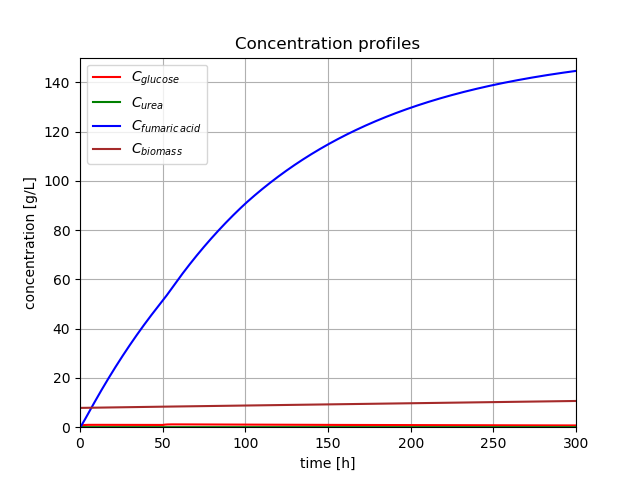

In [62]:
# Plot concentrations
MMg = 180.156
MMx = 24.6
MMn = 60.06
MMf = 116.072
plt.figure()
plt.grid()
plt.title("Concentration profiles")
plt.xlabel("time [h]")
plt.ylabel("concentration [g/L]")
plt.xlim(0, t_end)
plt.ylim(0, 150)
plt.plot(t, np.array(Cg_list)*MMg, "r", label="$C_{glucose}$")
plt.plot(t, np.array(Cn_list)*MMn, "g", label="$C_{urea}$")
plt.plot(t, np.array(Cfah2_list)*MMf, "b", label="$C_{fumaric\,acid}$")
plt.plot(t, np.array(Cx_list)*MMx, "brown", label="$C_{biomass}$")
plt.legend(loc="best")

<IPython.core.display.Javascript object>


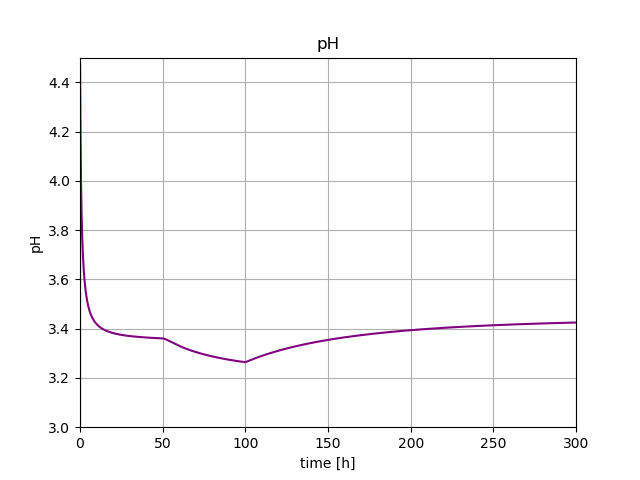

In [63]:
# Plot pH
plt.figure()
plt.grid()
plt.title("pH")
plt.xlabel("time [h]")
plt.ylabel("pH")
plt.xlim(0, t_end)
plt.ylim(3, 4.5)
plt.plot(t, pH_list, "purple")

<IPython.core.display.Javascript object>


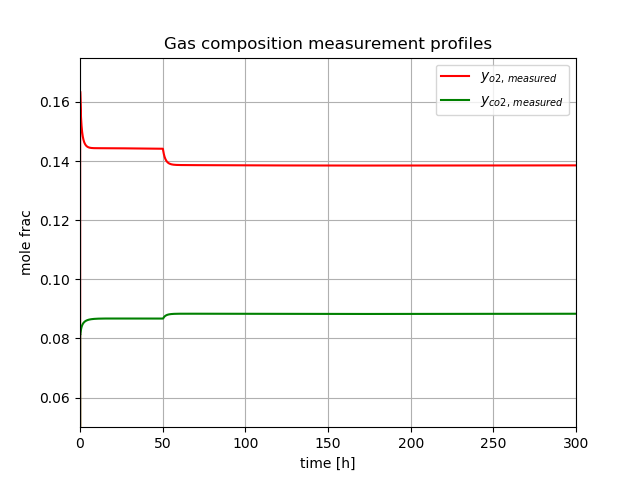

In [64]:
# Plot gas composition measurements
plt.figure()
plt.grid()
plt.title("Gas composition measurement profiles")
plt.xlabel("time [h]")
plt.ylabel("mole frac")
plt.xlim(0, t_end)
plt.ylim(0.05, 0.175)
plt.plot(np.array(t) + D, yo2_list, "r", label="$y_{o2,\,measured}$")
plt.plot(np.array(t) + D, yco2_list, "g", label="$y_{co2,\,measured}$")
plt.legend(loc="best")

<IPython.core.display.Javascript object>


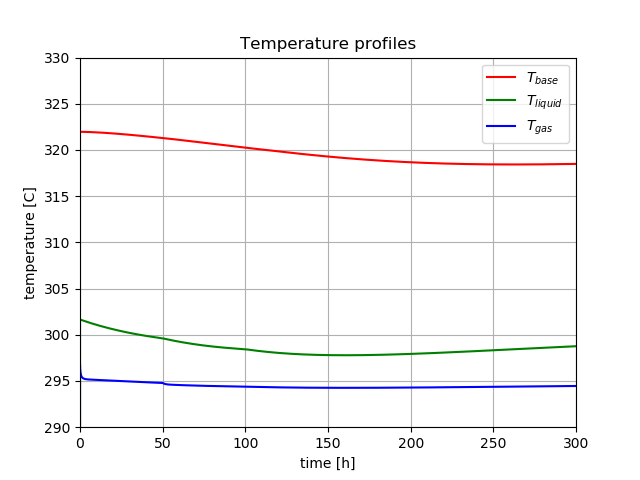

In [65]:
# Plot temperature profiles
plt.figure()
plt.grid()
plt.title("Temperature profiles")
plt.xlabel("time [h]")
plt.ylabel("temperature [C]")
plt.xlim(0, t_end)
plt.ylim(290, 330)
plt.plot(t, Tb_list, "r", label="$T_{base}$")
plt.plot(t, Tl_list, "g", label="$T_{liquid}$")
plt.plot(t, Tg_list, "b", label="$T_{gas}$")
plt.legend(loc="best")